<a href="https://colab.research.google.com/github/doronin99/clients/blob/main/clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

## Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.

_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Разведочный анализ данных и preprocessing

In [3]:
df.head(5)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [4]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

Удалим столбец `id`

In [6]:
df.drop(['id'], axis=1, inplace=True)

Удалим строки с пропущенными значениями во всех признаках, кроме `Age` и `Gender`, т.к. кол-во пропущенных значений в этих столбцах значительно больше

In [7]:
df.dropna(subset=filter(lambda x: x not in ['Gender', 'Age', 'satisfaction'], df.columns), inplace=True)

In [8]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,127916,128240,128240,128240,128240
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,64906,104747,88566,61367,58125


In [9]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58125
satisfied                  44472
-                          25643
Name: satisfaction, dtype: int64

Удалим строки с пропущенными значениями таргета и заменим значение *neutral or dissatisfied* на 1, а *satisfied* - на 0

In [10]:
df = df[df['satisfaction'] != '-']

In [11]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'neutral or dissatisfied' else 0)

Закодируем значение признаков `Gender`, `Customer Type`, `Type of Travel` нулем и единицей

In [12]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Customer Type'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

Преобразуем тип столбцов с категориальными признаками

In [13]:
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[list(filter(lambda x: x not in numeric_cols, df.columns))] = df[list(filter(lambda x: x not in numeric_cols, df.columns))].astype('category')

In [14]:
df[numeric_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,102339.000000,102597.000000,102597.000000,102597.000000
mean,40.047128,1327.268790,15.729388,16.781280
std,20.332450,4677.160433,73.868426,109.506957
min,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,612.000000,379620.000000,11011.000000,14006.000000


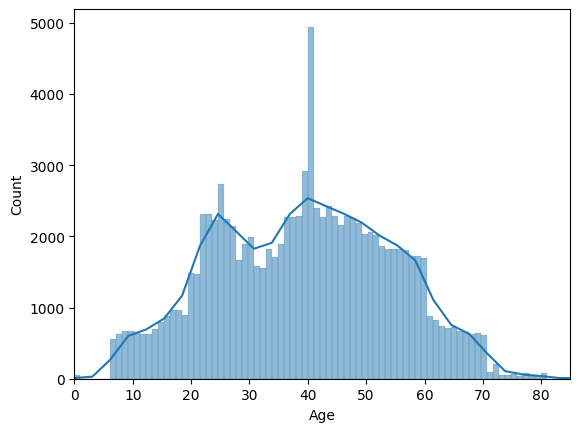

In [15]:
sns.histplot(df['Age'], kde=True).set_xlim(0,85)
plt.show()

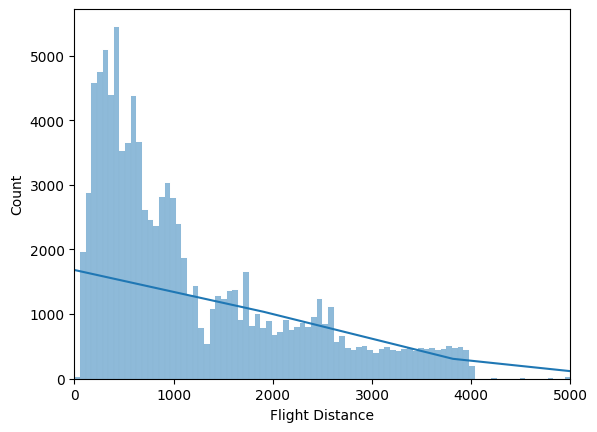

In [16]:
sns.histplot(df['Flight Distance'], kde=True).set_xlim(0,5000)
plt.show()

Заменим пропущенные значения в столбце `Age` средним значением

In [17]:
mean = df['Age'].mean()

df['Age'].fillna(mean, inplace=True)

Удалим строки с выбросами для признаков `Age` и `Flight Distance`, т.е. со значениями >80 и >4000 соответственно

In [18]:
df = df[df['Age'] < 80]
df = df[df['Flight Distance'] < 4000]

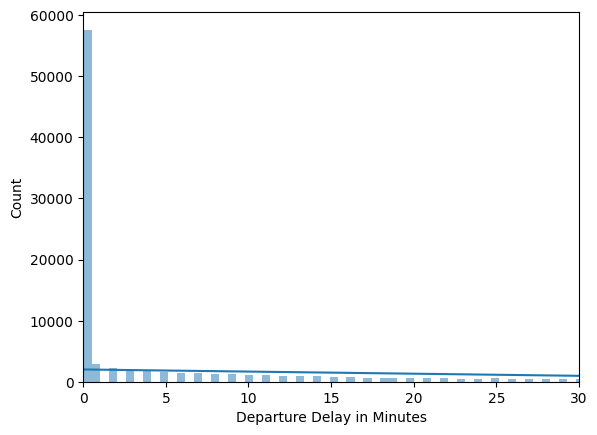

In [19]:
sns.histplot(df['Departure Delay in Minutes'], kde=True).set_xlim(0,30)
plt.show()

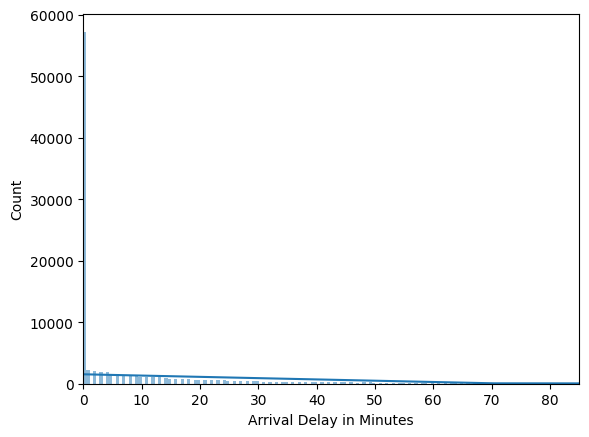

In [20]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True).set_xlim(0,85)
plt.show()

Удалим столбцы `Departure Delay in Minutes` и `Arrival Delay in Minutes`, т.к. значение в этих столбцах преимущественное нулевые

In [21]:
df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

Посмотрим на поведение признаков, которые представляют собой оценку от 1 до 5

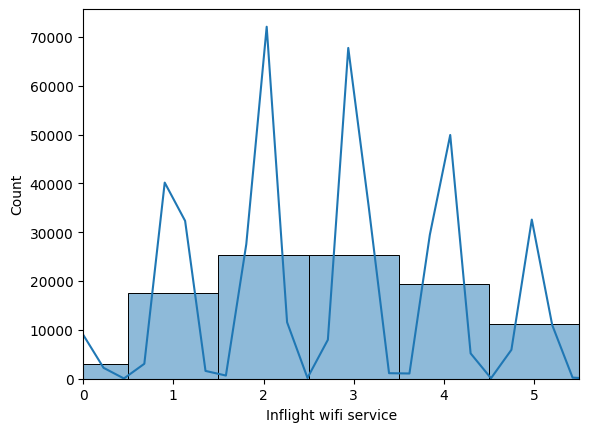

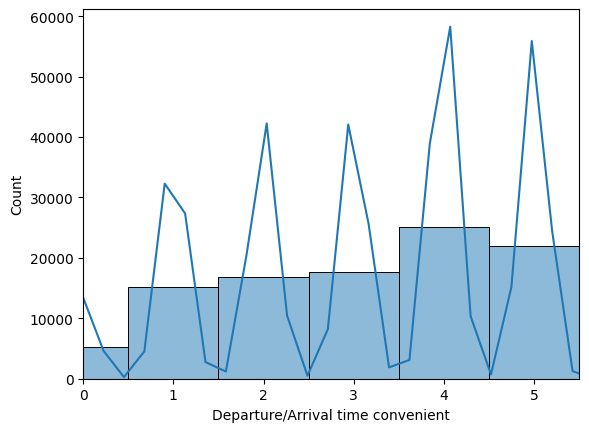

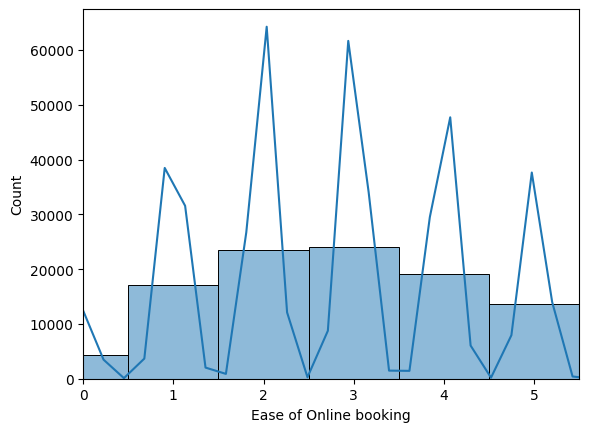

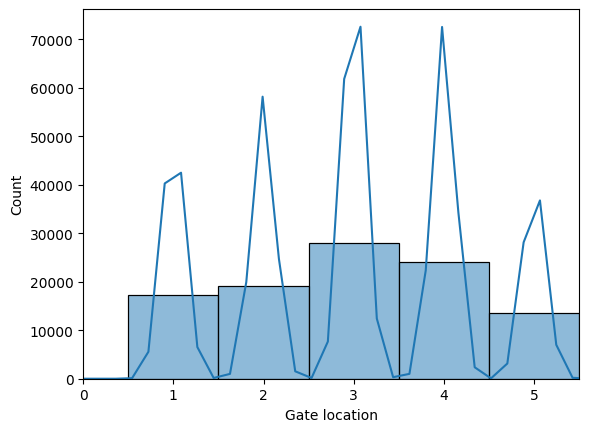

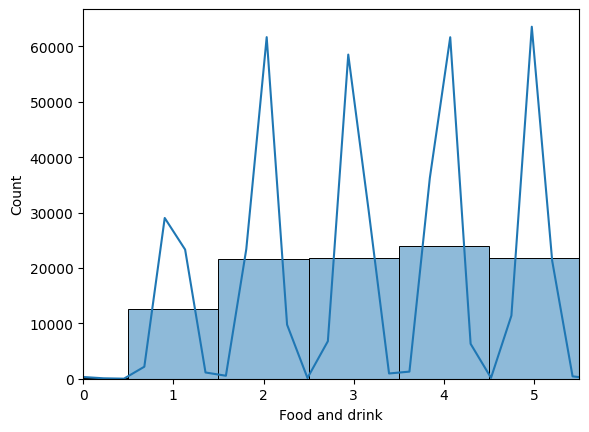

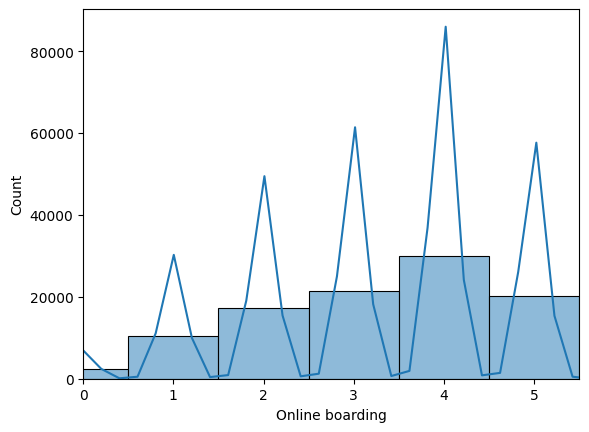

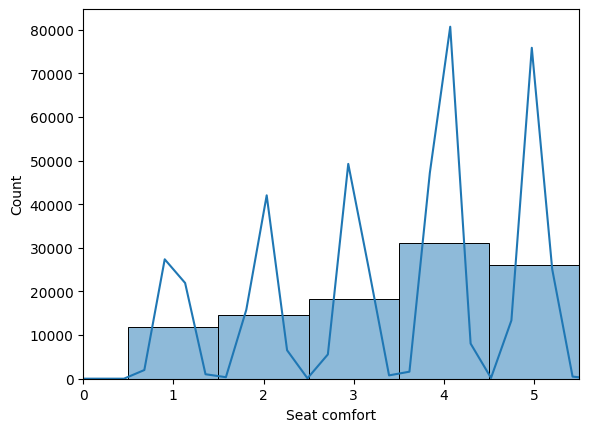

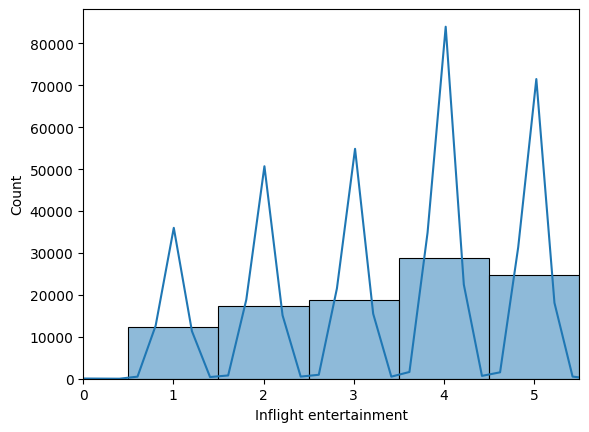

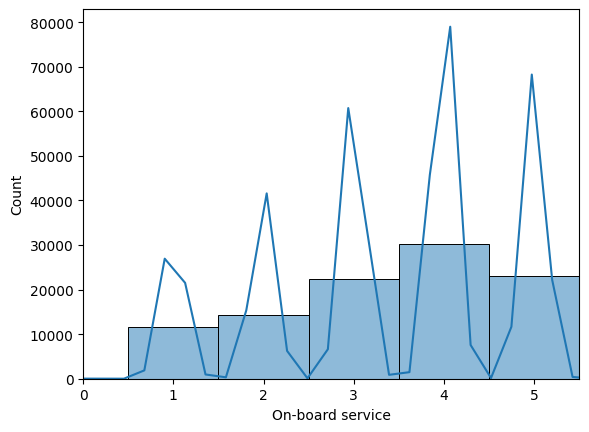

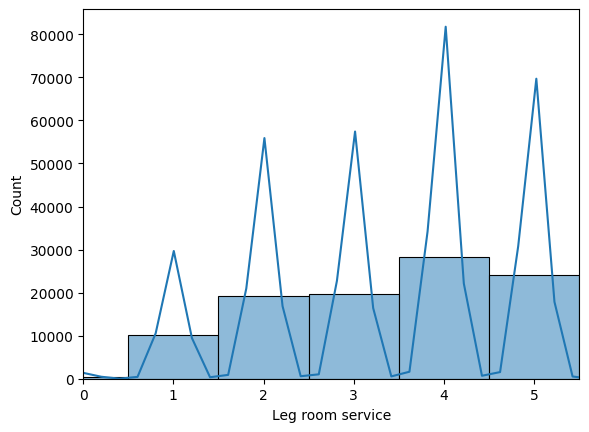

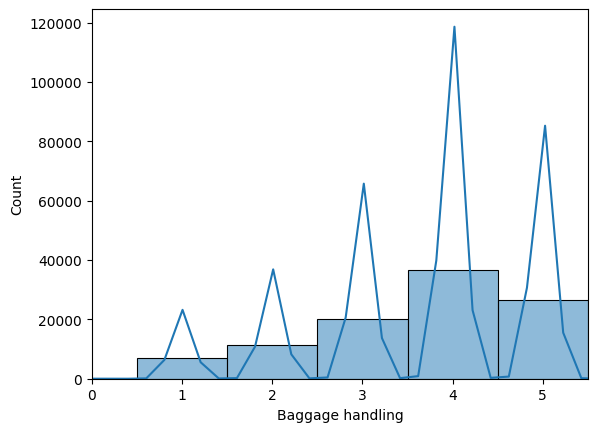

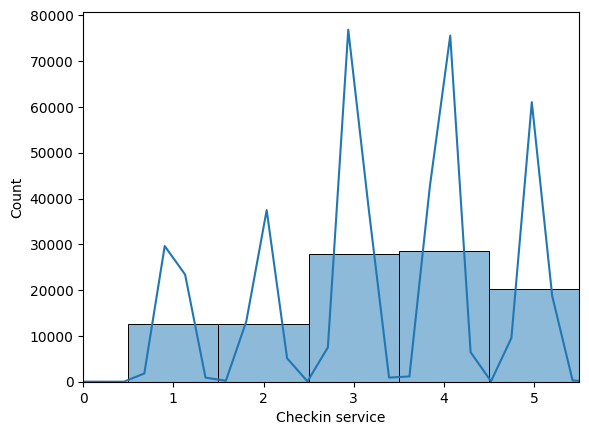

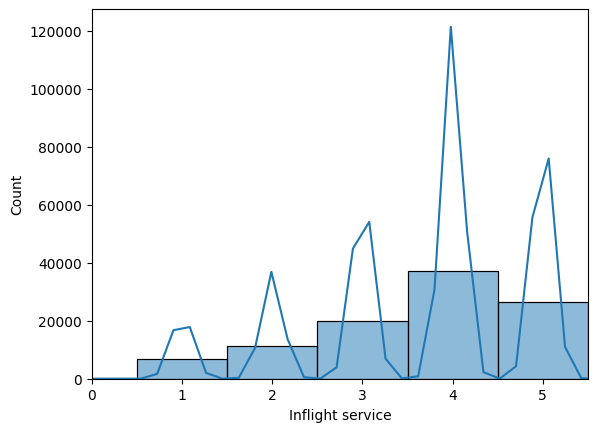

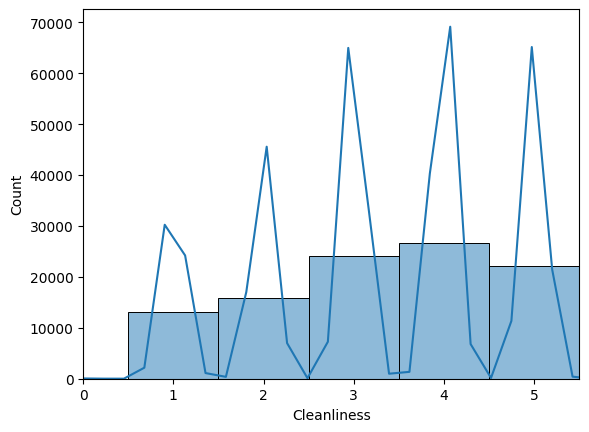

In [22]:
selected_cols = ['Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness']

for col in selected_cols:
  sns.histplot(df[col], kde=True).set_xlim(0,5.5)
  plt.show()

Среди данных признаков нет такого, в котором распределение оценок имело бы существенное смещение. Оставляем все признаки

## Построение элементарной модели

In [38]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (satisfaction)

In [39]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,48.0,0,1,Business,821.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,1,35.0,1,1,Business,821.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,0,41.0,1,1,Business,853.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,0,50.0,1,1,Business,1905.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,1,49.0,1,1,Business,3470.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


Дальше было бы целесообразно сделать энкодинг признака `Class`, скалировать некоторые другие признаки и др. Но на данном этапе, закодируем только признак `Class` простейшим способом с некоторыми оговорками

In [40]:
X['Class'].value_counts()

Business    48646
Eco         45905
Eco Plus     7346
Name: Class, dtype: int64

In [41]:
X['Class'] = X['Class'].apply(lambda x: 1 if x in ['Eco', 'Eco Plus'] else 0)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((76422, 20), (25475, 20))

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8235525024533856

## Улучшение модели логистической регрессии

In [45]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (satisfaction)

In [46]:
!pip install category_encoders -q

Закодируем призна `Class` c помощью OHE

In [47]:
from category_encoders.one_hot import OneHotEncoder

X = pd.concat([X.drop(['Class'], axis=1),
               OneHotEncoder().fit_transform(X['Class']).drop(['Class_1'], axis=1)],
              axis=1)
X.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_2,Class_3
0,0,48.0,0,1,821.0,3.0,3.0,3.0,3.0,5.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0,0
1,1,35.0,1,1,821.0,2.0,2.0,2.0,2.0,3.0,...,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0,0
2,0,41.0,1,1,853.0,4.0,4.0,4.0,4.0,5.0,...,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,0,0
3,0,50.0,1,1,1905.0,2.0,2.0,2.0,2.0,4.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,0,0
4,1,49.0,1,1,3470.0,3.0,3.0,3.0,3.0,4.0,...,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((76422, 21), (25475, 21))

Масштабируем признаки с помощью MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_2,Class_3
0,1.0,0.544304,1.0,1.0,0.067767,0.050,0.028571,0.044444,0.000000,0.111111,...,0.088889,0.050,0.044444,0.057143,0.055556,0.044444,0.055556,0.022222,0.0,0.0
1,0.0,0.658228,1.0,1.0,0.598650,0.125,0.142857,0.111111,0.114286,0.111111,...,0.088889,0.075,0.088889,0.142857,0.138889,0.088889,0.138889,0.088889,0.0,0.0
2,1.0,0.202532,1.0,1.0,0.765941,0.100,0.142857,0.111111,0.114286,0.111111,...,0.088889,0.100,0.022222,0.057143,0.083333,0.022222,0.083333,0.088889,0.0,0.0
3,0.0,0.227848,1.0,0.0,0.155039,0.100,0.114286,0.088889,0.085714,0.083333,...,0.066667,0.075,0.088889,0.057143,0.138889,0.111111,0.138889,0.066667,0.0,0.0
4,1.0,0.493671,0.0,1.0,0.045011,0.050,0.085714,0.044444,0.057143,0.083333,...,0.066667,0.075,0.088889,0.142857,0.111111,0.022222,0.083333,0.066667,1.0,0.0


Повторно построим модель логистической регрессии

In [53]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
accuracy_score(y_test, pred)

0.8712855740922473

Веса модели

In [55]:
importances = pd.DataFrame({'weights': lr.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
10,-16.916123,Online boarding
5,-12.331082,Inflight wifi service
16,-12.211418,Checkin service
13,-10.850868,On-board service
14,-7.785419,Leg room service
18,-7.064932,Cleanliness
17,-4.937881,Inflight service
15,-4.765647,Baggage handling
12,-4.510726,Inflight entertainment
11,-3.366086,Seat comfort


## Построение других моделей

Построим дерево решений

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

accuracy_score(y_test, pred)

0.9431207065750736